In [84]:
import numpy as np
import os
from PIL import Image
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Activation, Flatten, Dropout, GlobalAveragePooling2D
from keras.layers import merge, Input
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
classes = os.listdir('../DataSets/data_set/')
classes.remove('.DS_Store')
print classes

['dogs', 'cats', 'Humans', 'horses']


In [5]:
dict_labels = {'dogs': 0, 'cats': 1, 'Humans' : 2, 'horses': 3}
path = '../DataSets/data_set/'

In [108]:
x_, y_ = [], []
for ix in classes:
    img_list = os.listdir(path + ix)
    for img in img_list:
        img_path = path + ix + '/' + img
        
        x = Image.open( img_path )
        x = x.resize( (224,224) )
        x = np.array(x, dtype=np.float32)
        
        #x = x/(255.0)

        x_.append(x)
        y_.append(dict_labels[ix])
        
x_ = np.array(x_)
y_ = np.array(y_)
y_ = np_utils.to_categorical(y_)

print x_.shape, y_.shape

(390, 224, 224, 3) (390, 4)


In [109]:
x_, y_ = shuffle( x_, y_ )

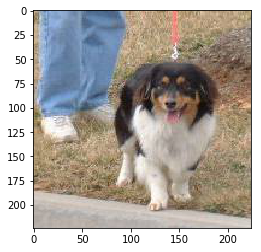

In [107]:
plt.imshow( x_[330] )
plt.show()

In [110]:
split = int( 0.8 * x_.shape[0] )
X_train = x_[:split,:]
X_test = x_[split:,:]
Y_train = y_[:split,:]
Y_test = y_[split:,:]
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(312, 224, 224, 3) (312, 4) (78, 224, 224, 3) (78, 4)


In [111]:
model = ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zeropadding2d_5 (ZeroPadding2D)  (None, 230, 230, 3)   0           input_5[0][0]                    
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 112, 112, 64)  9472        zeropadding2d_5[0][0]            
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [112]:
X_train_processed = preprocess_input( X_train )
X_test_processed = preprocess_input( X_test )
print (X_train_processed.shape, X_test_processed.shape)

((312, 224, 224, 3), (78, 224, 224, 3))


In [113]:
train_features = model.predict( X_train_processed )
print (train_features.shape)

(312, 1, 1, 2048)


In [114]:
test_features = model.predict( X_test_processed )
print (test_features.shape)

(78, 1, 1, 2048)


In [116]:
custom_model = Sequential()

custom_model.add( GlobalAveragePooling2D( input_shape= train_features.shape[1:] ) )
custom_model.add( Dense( 512, activation='relu' ) )
custom_model.add( Dropout(0.5)  )
custom_model.add( Dense(256, activation='relu') )
custom_model.add ( Dropout(0.5) )
custom_model.add( Dense(4, activation='softmax') )

custom_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
globalaveragepooling2d_6 (Global (None, 2048)          0           globalaveragepooling2d_input_6[0]
____________________________________________________________________________________________________
dense_17 (Dense)                 (None, 512)           1049088     globalaveragepooling2d_6[0][0]   
____________________________________________________________________________________________________
dropout_10 (Dropout)             (None, 512)           0           dense_17[0][0]                   
____________________________________________________________________________________________________
dense_18 (Dense)                 (None, 256)           131328      dropout_10[0][0]                 
___________________________________________________________________________________________

In [117]:
custom_model.compile( loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [118]:
custom_model.fit( train_features, Y_train, batch_size=8, nb_epoch=30,validation_data=(test_features, Y_test), shuffle=True )

Train on 312 samples, validate on 78 samples
Epoch 1/30
312/312 [==============================] - 2s - loss: 1.1742 - acc: 0.6891 - val_loss: 0.2232 - val_acc: 0.8974
Epoch 2/30
312/312 [==============================] - 0s - loss: 0.3730 - acc: 0.8846 - val_loss: 0.0967 - val_acc: 0.9744
Epoch 3/30
312/312 [==============================] - 0s - loss: 0.2004 - acc: 0.9263 - val_loss: 0.0947 - val_acc: 0.9615
Epoch 4/30
312/312 [==============================] - 1s - loss: 0.2082 - acc: 0.9519 - val_loss: 0.2451 - val_acc: 0.9487
Epoch 5/30
312/312 [==============================] - 0s - loss: 0.0968 - acc: 0.9583 - val_loss: 0.1996 - val_acc: 0.9487
Epoch 6/30
312/312 [==============================] - 1s - loss: 0.1428 - acc: 0.9647 - val_loss: 0.0493 - val_acc: 0.9872
Epoch 7/30
312/312 [==============================] - 1s - loss: 0.1084 - acc: 0.9583 - val_loss: 0.0773 - val_acc: 0.9872
Epoch 8/30
312/312 [==============================] - 1s - loss: 0.1136 - acc: 0.9712 - val_lo